# Exploratory Data Analysis

### Relevant Data Sources:

- Clear Lake (Facebook Images): https://www.facebook.com/ClearLakeWaterQuality/photos

- Cayuga Lake: http://www.communityscience.org/monitoring-partnerships/harmful-algal-bloom-monitoring/harmful-algal-bloom-datasets/

- Wyoming Lakes: https://wdeq.maps.arcgis.com/apps/Shortlist/index.html?appid=342d22d86d0048819b8dfa61dd3ff061

- Florida Lakes: https://floridadep.gov/AlgalBloom

In [38]:
# Load in libraries/packages for Data Processing
import numpy as np
import pandas as pd
import os
import random
from sklearn.utils import shuffle
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

# Load in libaries/packages for ML Models
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers
import sklearn.metrics as metrics
from tensorflow.keras import regularizers
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import random

In [4]:
# Get path
os.getcwd()
os.chdir('Filtered_Data2')

'/Users/teoyinyin/Desktop'

In [6]:
# Paths to data directories
no_advisory_dir = './No_Advisory'
caution_dir = './Caution'
danger_dir = './Danger'

# Pull in training data
no_advisory_data = []
no_advisory_labels = []

warning_data = []
warning_labels = []

caution_data = []
caution_labels = []

danger_data = []
danger_labels = []

# Getting the paths and labels of our no_advisory data

for image in os.listdir(no_advisory_dir):
    no_advisory_data.append(no_advisory_dir+'/'+image)
    no_advisory_labels.append('no_advisory')

# Getting the paths and labels of our caution data
for image in os.listdir(caution_dir):
    caution_data.append(caution_dir+'/'+image)
    caution_labels.append('caution')

# Getting the paths and labels of our danger data
for image in os.listdir(danger_dir):
    danger_data.append(danger_dir+'/'+image)
    danger_labels.append('danger')

no_advisory_data, no_advisory_labels = shuffle(no_advisory_data, no_advisory_labels)
warning_data, warning_labels = shuffle(warning_data, warning_labels)
caution_data, caution_labels = shuffle(caution_data, caution_labels)
danger_data, danger_labels = shuffle(danger_data, danger_labels)

In [7]:
df_no_advisory = pd.DataFrame({'image_path': no_advisory_data, 'label':no_advisory_labels})
df_caution = pd.DataFrame({'image_path': caution_data, 'label':caution_labels})
df_danger = pd.DataFrame({'image_path': danger_data, 'label':danger_labels})

In [28]:
# Combine image data of all categories into one DataFrame
df = pd.concat([df_no_advisory, df_caution, df_danger], ignore_index = True)
df.head()

image_path        label
0  ./No_Advisory/Image1-3d906f81acd64b1a9d220497a...  no_advisory
1       ./No_Advisory/342_image3-20201117-145735.jpg  no_advisory
2       ./No_Advisory/356_image1-20201208-143001.jpg  no_advisory
3        ./No_Advisory/BloomImg1-20230918-140737.jpg  no_advisory
4       ./No_Advisory/156_image3-20200729-173914.jpg  no_advisory

### Distribution of Toxicity Labels

In [29]:
print("Value Counts of Labels:")
df.label.value_counts()

Value Counts of Labels:


no_advisory    211
danger         164
caution        149
Name: label, dtype: int64

In [30]:
# Count the occurrences of each label
label_counts = df['label'].value_counts().reset_index()

# Plot distribution of labels
fig = px.bar(label_counts, x='index', y='label', color='index', labels={'label': 'Count', 'index': 'Label'},
             title='Distribution of Labels')
fig.show()

### Visualizing Sample Images

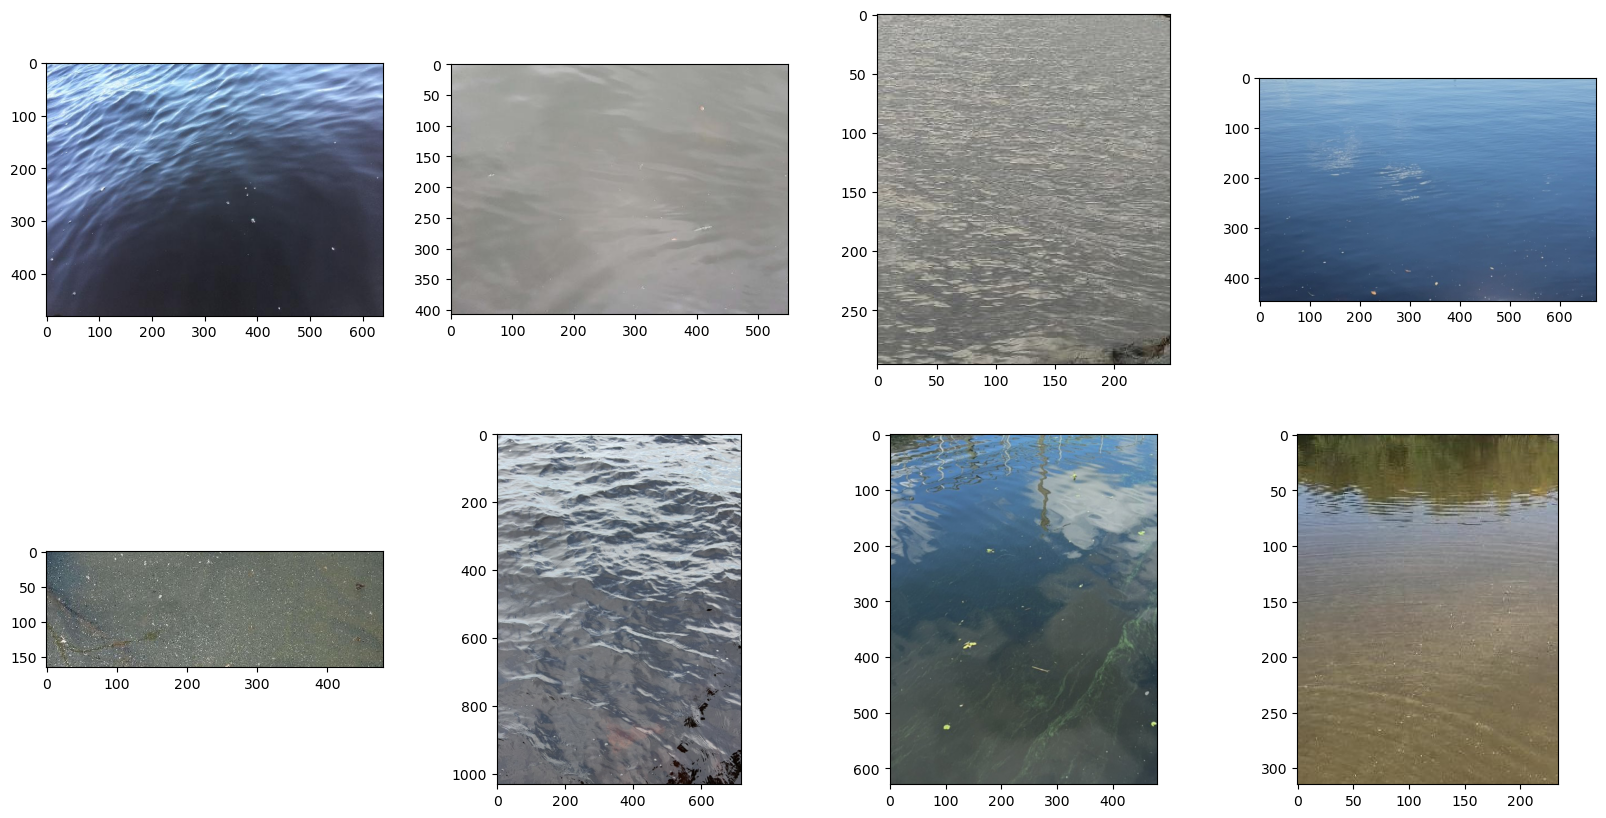

In [31]:
#check first few images of no advisory
images = []
for idx, img in enumerate(df_no_advisory.image_path):
    img = load_img(
    img)
    images.append(img)

nrows, ncols = 2,4 #print first 8 images
f, axs = plt.subplots(nrows, ncols, figsize=(20,10))
indx = 0
for i in range(nrows):
    for j in range(ncols):
        axs[i,j].imshow(images[indx])
        indx += 1

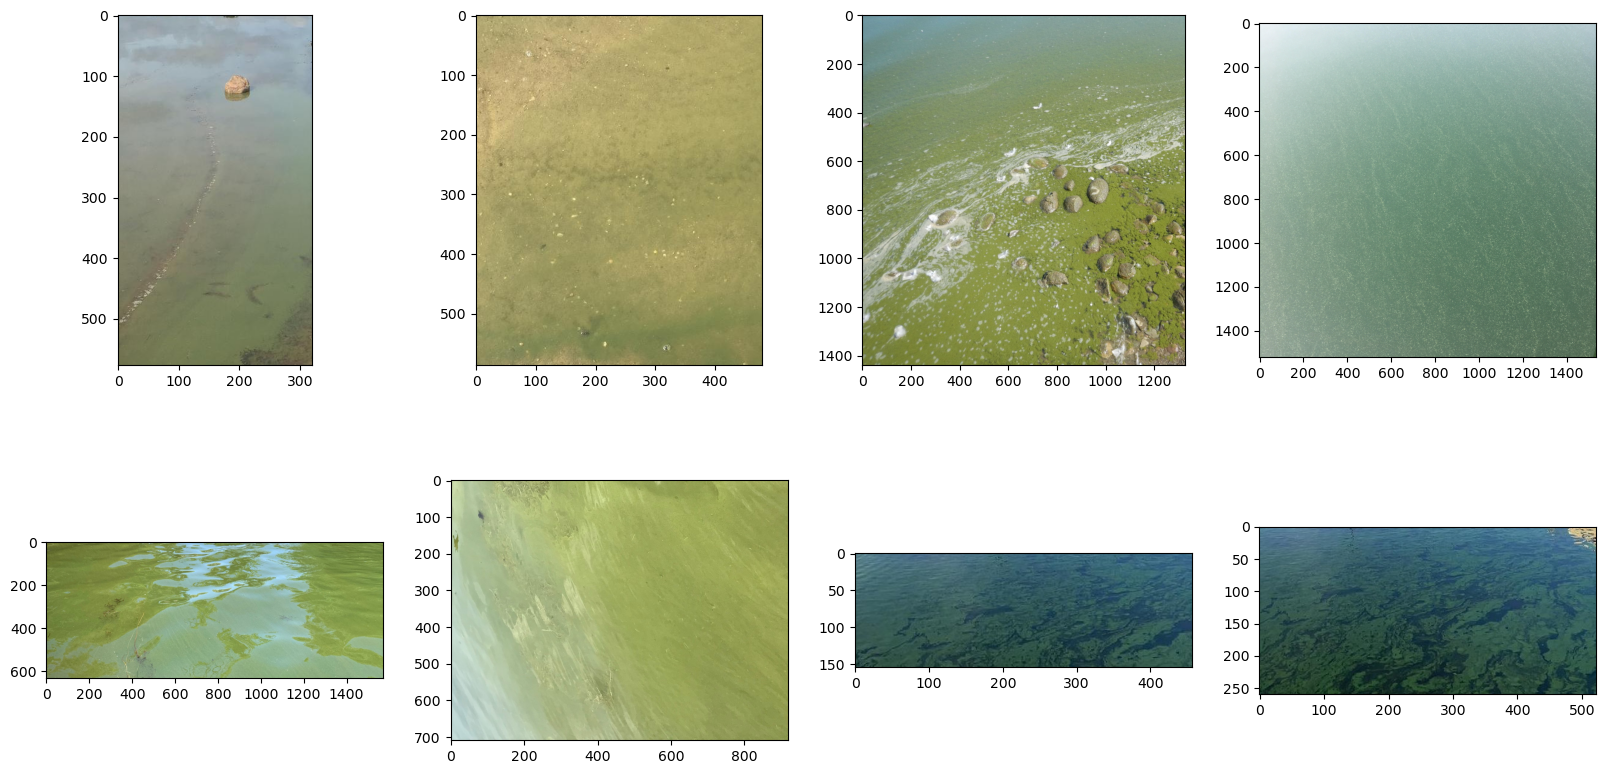

In [11]:
#check first few images of caution
images = []
for idx, img in enumerate(df_caution.image_path):
    img = load_img(
    img)
    images.append(img)

nrows, ncols = 2,4 #print first 8 images
f, axs = plt.subplots(nrows, ncols, figsize=(20,10))
indx = 0
for i in range(nrows):
    for j in range(ncols):
        axs[i,j].imshow(images[indx])
        indx += 1

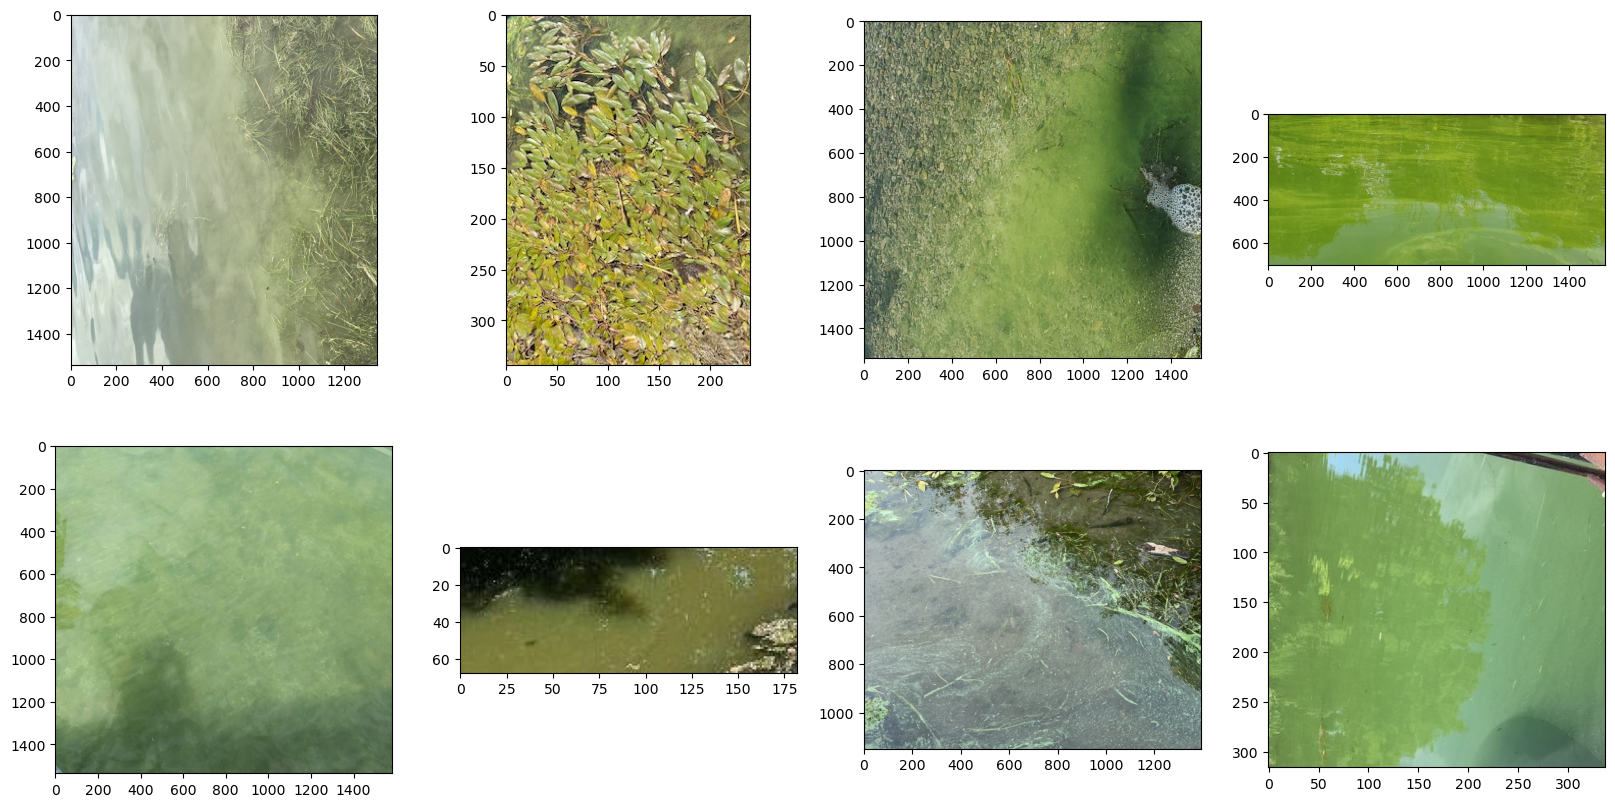

In [13]:
#check first few images of danger
images = []
for idx, img in enumerate(df_danger.image_path):
    img = load_img(
    img)
    images.append(img)

nrows, ncols = 2,4 #print first 8 images
f, axs = plt.subplots(nrows, ncols, figsize=(20,10))
indx = 0
for i in range(nrows):
    for j in range(ncols):
        axs[i,j].imshow(images[indx])
        indx += 1

### Combinations of Height and Width Frequencies

In [32]:
warnings.simplefilter(action='ignore', category=FutureWarning)

df_res = pd.DataFrame(columns = ['height', 'width'])

for img in df.image_path:
    img = load_img(img)
    width = int(img.width)
    height = int(img.height)

    df_res = df_res.append({'height': height, 'width': width}, ignore_index=True)

In [33]:
df_res = df_res.astype({'height':int, 'width':int})

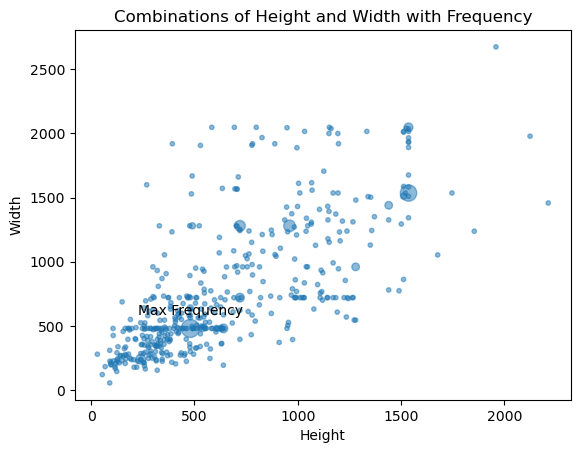

In [34]:
combination_frequency = df_res.groupby(['height', 'width']).size().reset_index(name='frequency')

plt.scatter(combination_frequency['height'], combination_frequency['width'], s=combination_frequency['frequency']*10, alpha=0.5)

# Find the index with the maximum frequency
max_freq_index = combination_frequency['frequency'].idxmax()

# Annotate the point with the highest frequency
plt.annotate('Max Frequency',
             (combination_frequency['height'][max_freq_index], combination_frequency['width'][max_freq_index]),
             textcoords="offset points",
             xytext=(0,10),
             ha='center')

plt.xlabel('Height')
plt.ylabel('Width')
plt.title('Combinations of Height and Width with Frequency')
plt.show()

## Key Observations

During the exploratory data analysis (EDA) phase, several observations were made regarding our dataset. Firstly, it is imperative to resize or standardize our images to ensure uniformity in their dimensions. This step is crucial for facilitating consistent processing and model training.

Secondly, a class imbalance was identified, with a notable disparity in the number of instances across different classes. Particularly, the minority class, 'danger' and 'caution,' could benefit from upsampling to address this imbalance and enhance the model's ability to learn from all classes effectively.

Furthermore, incorporating data augmentation techniques for our images was identified as a beneficial step. Data augmentation introduces variability in the dataset by applying transformations such as rotation, flipping, and zooming. This approach helps diversify the training set, potentially improving the model's robustness.

Additionally, a plan to visualize the separation between different image classes was suggested. This involves employing t-distributed stochastic neighbor embedding (t-SNE) to create a two-dimensional representation of the high-dimensional image features. Examining the t-SNE plot can provide insights into whether distinct clusters or separations exist between the classes, aiding in the understanding of the data's inherent structure. These EDA observations collectively contribute to the refinement of our dataset and lay the groundwork for more effective model training and performance evaluation.